# Loading the Data

In [1]:
import os
import tarfile
import urllib

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datastes/housing/housing.tgz"

In [2]:
import pandas as pd

def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

In [3]:
housing = load_housing_data()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


# Analyzing the Data

In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
housing['ocean_proximity'].value_counts()
# to count the counts of each category

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [6]:
housing.describe(include='all')

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<1H OCEAN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9136
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909,NaN
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874,NaN
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000,NaN
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000,NaN
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000,NaN
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000,NaN


Here we see that null values are not counted (as the number of bedrooms is 20433). Also we find that mostly middle aged and some young and old people live in these houses (after looking at percentile info of housing_median_age). Majority of the houses are located far away from the ocean. Also the median income is does not deviate that much from the mean.

In [7]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

/home/priyam/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:298: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/home/priyam/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:298: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/home/priyam/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:304: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
/home/priyam/anaconda3/lib/python3.7/site

array([[<AxesSubplot:title={'center':'households'}>,
        <AxesSubplot:title={'center':'housing_median_age'}>,
        <AxesSubplot:title={'center':'latitude'}>],
       [<AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'median_house_value'}>,
        <AxesSubplot:title={'center':'median_income'}>],
       [<AxesSubplot:title={'center':'population'}>,
        <AxesSubplot:title={'center':'total_bedrooms'}>,
        <AxesSubplot:title={'center':'total_rooms'}>]], dtype=object)

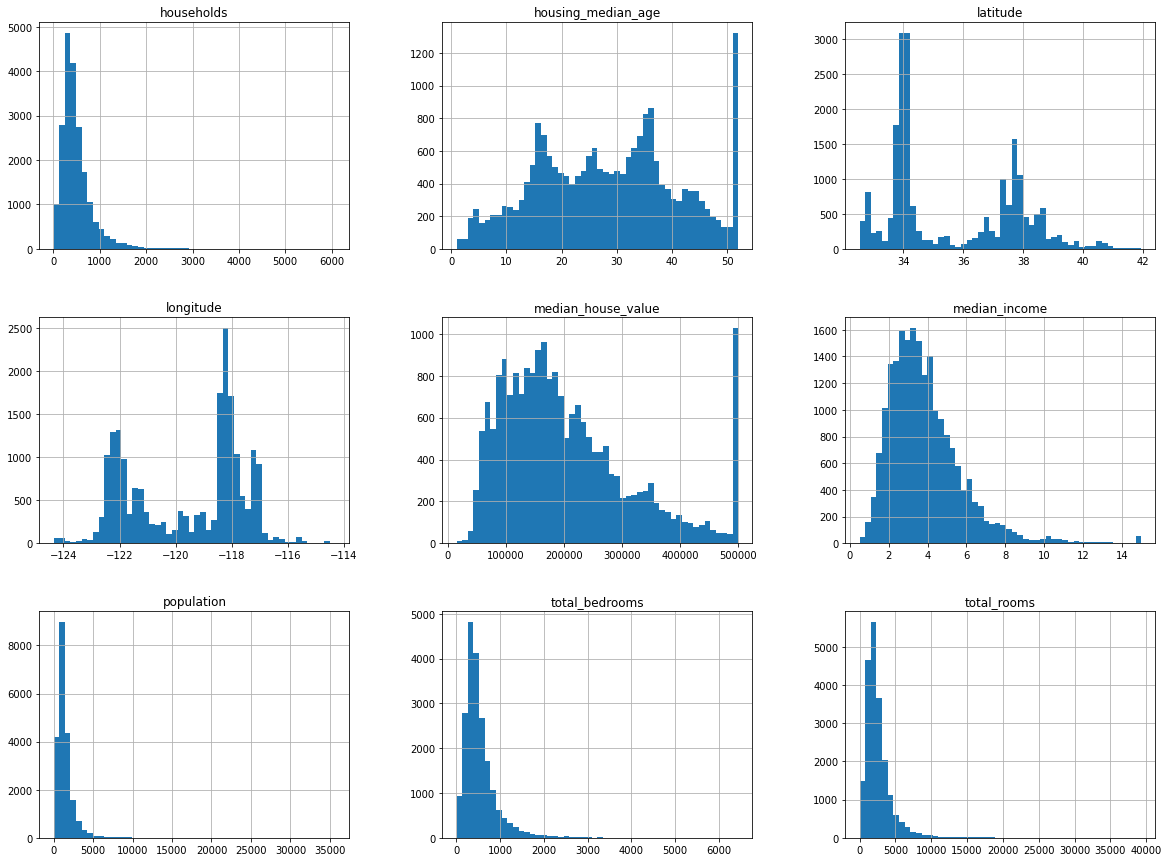

In [8]:
housing.hist(bins = 50, figsize = (20, 15))

Here we see that the housing_median_age, median_house_value, and median_income are capped (we can see a sharp increase in the histograms at the ends). Also, all the features are tail heavy (i.e. more values to the right of the median), which we have to convert to a more bell-shaped curve.

# Dividing the data into testing and training set

Randomly splitting the data into training and testing data is not good as the data will not be representative of all the groups present (or the importance of each category would be biased). So we divide the data into categories based on an important factor (in this case the median_income) and the divide the data so that the percentage of samples of each category is same in both training and testing data.

<AxesSubplot:>

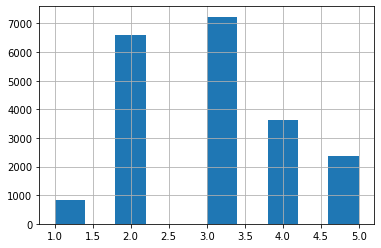

In [9]:
import numpy as np
housing['income_cat'] = pd.cut(housing['median_income'],
                              bins = [0.0, 1.5, 3.0, 4.5, 6.0, np.inf],
                              labels = [1, 2, 3, 4, 5])
housing['income_cat'].hist()
# here we are cutting the data up into categories

In [10]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits = 1, test_size = 0.2, random_state = 42)
for train_index, test_index in split.split(housing, housing['income_cat']):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]
# SSS is a model which gives the stratified index after data has been fed into it

In [11]:
for set_ in (strat_test_set, strat_train_set):
    set_.drop('income_cat', axis = 1, inplace = True)
# we are removing the category feature so that data is returned to original form

# Visualizing the Data and getting correlations between features

housing = strat_train_set.copy()

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

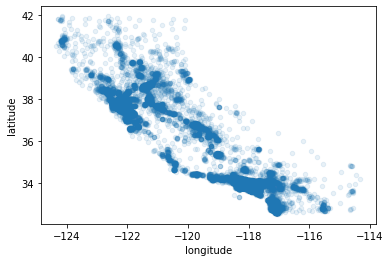

In [12]:
housing.plot(x = 'longitude', y = 'latitude', kind = 'scatter', alpha = 0.1)
# alpha decides the transparency

/home/priyam/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:298: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/home/priyam/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:298: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/home/priyam/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:304: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
/home/priyam/anaconda3/lib/python3.7/site

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

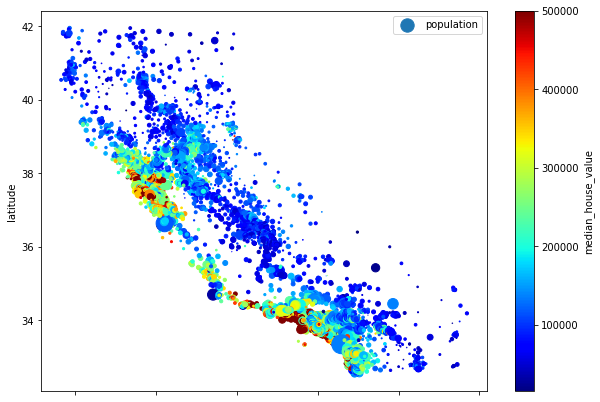

In [13]:
housing.plot(kind = 'scatter', x = 'longitude', y = 'latitude',
            s = housing['population']/100, label = 'population', figsize = (10, 7),
            c = 'median_house_value', colorbar = True, cmap = plt.get_cmap('jet'))
# here the 's' decides the radius of each circle by using the district population, 'c' decides the colour
# according to the median house value

In [14]:
corr_matrix = housing.corr()

In [15]:
corr_matrix['median_house_value'].sort_values(ascending = False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

Correlation coeff. ranges from **-1 to 1** and shows how related the two features are. Coeff. near to 1 signifies very close relationship and coeff. near -1 signifies strong negative relation ship (i.e. inverse). Coeff. of 0 signifies that no **linear relationship**.

<AxesSubplot:xlabel='median_income', ylabel='median_house_value'>

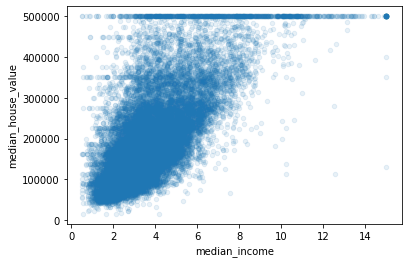

In [16]:
housing.plot(x = 'median_income', y = 'median_house_value', kind = 'scatter', alpha = 0.1)

Here we can see that the price is capped at 500000

In [17]:
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"]=housing["population"]/housing["households"]

In [18]:
corr_matrix = housing.corr()
corr_matrix['median_house_value']

longitude                  -0.045967
latitude                   -0.144160
housing_median_age          0.105623
total_rooms                 0.134153
total_bedrooms              0.049686
population                 -0.024650
households                  0.065843
median_income               0.688075
median_house_value          1.000000
rooms_per_household         0.151948
bedrooms_per_room          -0.255880
population_per_household   -0.023737
Name: median_house_value, dtype: float64

Here we combine different features to produce features that are more related with the target label, so that the algorithm can differentiate between samples easily.

# Preparing the data for machine learning algorithms

In [19]:
housing = strat_train_set.drop('median_house_value', axis = 1)
housing_labels = strat_train_set['median_house_value'].copy()
# we take copy of data

In [20]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy = 'median') # making an instance of SimpleImputer
housing_num = housing.drop('ocean_proximity', axis = 1) #as median only works on num data
imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [21]:
imputer.statistics_ # tells about the learned parameters of an estimator

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409])

In [22]:
X = imputer.transform(housing_num) # transforming the data according to the model(here it is just entering the value of median for a column in null or none spot)
housing_tr = pd.DataFrame(X, columns = housing_num.columns,
                         index = housing_num.index)

In [23]:
housing_tr.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
count,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000
mean,-119.575834,35.639577,28.653101,2622.728319,533.998123,1419.790819,497.060380,3.875589
std,2.001860,2.138058,12.574726,2138.458419,410.839621,1115.686241,375.720845,1.904950
min,-124.350000,32.540000,1.000000,6.000000,2.000000,3.000000,2.000000,0.499900
25%,-121.800000,33.940000,18.000000,1443.000000,296.000000,784.000000,279.000000,2.566775
50%,-118.510000,34.260000,29.000000,2119.500000,433.000000,1164.000000,408.000000,3.540900
75%,-118.010000,37.720000,37.000000,3141.000000,641.000000,1719.250000,602.000000,4.744475
max,-114.310000,41.950000,52.000000,39320.000000,6210.000000,35682.000000,5358.000000,15.000100


In [24]:
housing_cat = housing[['ocean_proximity']] # categorical data

Different kinds of encoders can be used to convert categorical data to numerical data, but we should take care that making a category equal to a number will make the ml algo assume preferences based on value. So, we will use the one hot encoding approach to encode categorical data.

In [25]:
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder() #instance of OneHotEncoder
housing_cat_1hot = cat_encoder.fit_transform(housing_cat) # requires 2D data
# uses a spare_matrix to store data as there are too many zeros after one hot encoding

In [26]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

We can write our own transformers by using BaseEstimator and TransformerMixin as base classes (we will get fit_transform method after using TransformerMixin)

In [27]:
from sklearn.base import BaseEstimator, TransformerMixin
rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6 #the column numbers

class CombinedAttributeAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True):
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y = None):
        return self #no need to do anything as no algorithm
    def transform(self, X):
        rooms_per_household = X[:, rooms_ix]/X[:, households_ix]
        population_per_household = X[:, population_ix]/X[:, households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix]/X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,
                        bedrooms_per_room]                                  #pastes together all the given data
        else:
            return np.c_[X, rooms_per_household, population_per_household]
        
attr_adder = CombinedAttributeAdder(add_bedrooms_per_room=False)
house_extra_attribs = attr_adder.transform(housing.values)

We have to scale all the data features because ml algos do not work well with unscaled data. We can use either normalization or standardization to scale data. We will use standardization here because it is less affected by outliers than normalization. Scalers and transformations are fit to training data only (i.e. they learn only from training data)

In [28]:
# We will now implement a transformation pipeline
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler # kind of a standardization scaler
num_pipeline = Pipeline([ #names written will be used in future
    ('imputer', SimpleImputer(strategy='median')),
    ('attribs_adder', CombinedAttributeAdder()),
    ('std_scaler', StandardScaler()),
])
housing_num_tr = num_pipeline.fit_transform(housing_num)

In [29]:
from sklearn.compose import ColumnTransformer

num_attribs = list(housing_num)
cat_attribs = ['ocean_proximity']

full_pipeline = ColumnTransformer([
    ('num', num_pipeline, num_attribs), #runs numerical pipeline
    ('cat', OneHotEncoder(), cat_attribs), #runs categorical pipeline
])

housing_prepared = full_pipeline.fit_transform(housing)

# Selecting and training the model

In [30]:
# first we are going to use linear regression
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression() #instance of a model
lin_reg.fit(housing_prepared, housing_labels) #fitting the data i.e. training the model

LinearRegression()

In [31]:
ex_data = housing.iloc[:5] #preparing some sample data for testing
ex_labels = housing_labels.iloc[:5]
ex_prepared = full_pipeline.transform(ex_data) #transforming the data through the pipeline
print('Predictions: ', list(lin_reg.predict(ex_prepared)))
print('Labels: ', list(ex_labels))

Predictions:  [210644.60459285552, 317768.8069721082, 210956.43331178243, 59218.988868490764, 189747.55849878537]
Labels:  [286600.0, 340600.0, 196900.0, 46300.0, 254500.0]


In [32]:
from sklearn.metrics import mean_squared_error #calculating the rmse for the model
housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

68628.19819848923

The error is very high and we can see that the model is underfitting the training data. Here the model is not powerful enough so we should try to test for a more complex model.

In [33]:
#we are testing for Decision tree regressor
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor()

In [34]:
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

Here we see that the rmse comes out to be 0, which is nearly impossible. This means that the model is badly overfitting the training data, so we have to test this theory by using cross validation.

In [35]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_reg, housing_prepared, housing_labels,
                        scoring = 'neg_mean_squared_error', cv = 10)
tree_rmse_scores = np.sqrt(-scores)
#here we take negative because cross validation expects a utility
#fuction rather than the cost function which is negative of it

In [36]:
def display_scores(scores):
    print('Scores:', scores)
    print('Mean:', scores.mean())
    print('Standard deviation:', scores.std())
    
display_scores(tree_rmse_scores)

Scores: [69808.73831372 66832.40421163 71024.25833981 68134.31455785
 70124.02720323 74168.25434481 72053.74052722 70920.45108511
 76810.32294561 69767.04822195]
Mean: 70964.35597509207
Standard deviation: 2723.781920375153


In [37]:
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels,
                            scoring = 'neg_mean_squared_error', cv = 10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [66782.73843989 66960.118071   70347.95244419 74739.57052552
 68031.13388938 71193.84183426 64969.63056405 68281.61137997
 71552.91566558 67665.10082067]
Mean: 69052.46136345083
Standard deviation: 2731.6740017983493


We can see here that the decision tree reg is performing worse than linear regression as it is overfitting the data very badly. We will now use random forest reg which trains many decision trees on random subsets of features and then averages out their predictions. This is called ensemble learning.

In [38]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_reg.fit(housing_prepared, housing_labels)
forest_mse = cross_val_score(forest_reg, housing_prepared, housing_labels,
                            scoring = 'neg_mean_squared_error', cv = 10)
forest_rmse = np.sqrt(-forest_mse)
display_scores(forest_rmse)

Scores: [49558.14157224 47618.33449955 50250.85307502 52332.98799886
 49731.21083027 53269.48312966 48772.70480622 47786.7710727
 53259.89018747 49928.83066994]
Mean: 50250.92078419294
Standard deviation: 1963.2134304006452


In [39]:
housing_predictions = forest_reg.predict(housing_prepared)
forest_mse = mean_squared_error(housing_labels, housing_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

18633.739488114796

We see above that the rmse score for the training set is very much lower than the score on the validation sets, this means that the random forest regressor is still overfitting the data, just not as bad as decision tree regressor. We can reduce this overfitting by regularizing the model (i.e. applying constraints to it) or by getting lots of training data.

# Fine tuning the model

For fine tuning the model, we will use GridSearchCV. It will take all the hyperparameters that we want to experiment with as an input and  will evaluate all the possible combinations using cross validation.

In [40]:
from sklearn.model_selection import GridSearchCV
param_grid = [
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},]
forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                          scoring='neg_mean_squared_error',
                          return_train_score=True)
grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [41]:
grid_search.best_params_

{'max_features': 8, 'n_estimators': 30}

In [42]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres['mean_test_score'], cvres['params']):
    print(np.sqrt(-mean_score), params)

63069.42546298496 {'max_features': 2, 'n_estimators': 3}
55684.32846358554 {'max_features': 2, 'n_estimators': 10}
52862.84058327295 {'max_features': 2, 'n_estimators': 30}
60108.35022156486 {'max_features': 4, 'n_estimators': 3}
53161.60830851946 {'max_features': 4, 'n_estimators': 10}
50657.78410641752 {'max_features': 4, 'n_estimators': 30}
59738.28130096534 {'max_features': 6, 'n_estimators': 3}
52206.43396565997 {'max_features': 6, 'n_estimators': 10}
50092.41976978502 {'max_features': 6, 'n_estimators': 30}
58990.27634616767 {'max_features': 8, 'n_estimators': 3}
52038.928428557614 {'max_features': 8, 'n_estimators': 10}
50033.25986659589 {'max_features': 8, 'n_estimators': 30}
62258.31769754932 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54478.81851996877 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
61040.1304096832 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52679.98928533494 {'bootstrap': False, 'max_features': 3, 'n_estimators': 10

What GridSearchCV does is that it first evaluates the 12 combinations in the first parameter dictionary and then the 6 combinations in the second dictionary. It will train each of the 18 models five times using cross validation.

In [43]:
grid_search.best_estimator_

RandomForestRegressor(max_features=8, n_estimators=30)

In [44]:
#analyzing the best model and its errors
feature_importances = grid_search.best_estimator_.feature_importances_
extra_attribs = ['rooms_per_hhold', 'pop_per_hhold', 'bedrooms_per_room']
cat_encoder = full_pipeline.named_transformers_['cat']
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse = True)

[(0.35048405904313995, 'median_income'),
 (0.16619865381712154, 'INLAND'),
 (0.11390813037975753, 'pop_per_hhold'),
 (0.07156047778381208, 'bedrooms_per_room'),
 (0.06606063047322255, 'longitude'),
 (0.058487745416035956, 'latitude'),
 (0.05785301948500992, 'rooms_per_hhold'),
 (0.04309384229538022, 'housing_median_age'),
 (0.015502093998391071, 'population'),
 (0.014985294734192627, 'total_rooms'),
 (0.014875116032793902, 'total_bedrooms'),
 (0.013879700356536191, 'households'),
 (0.007959705798936352, '<1H OCEAN'),
 (0.0035130172137789527, 'NEAR OCEAN'),
 (0.001578238073146612, 'NEAR BAY'),
 (6.027509874450091e-05, 'ISLAND')]

With this we can see which features were most important in the prediction of labels. This is a property of the RandomForestRegressor.

In [45]:
final_model = grid_search.best_estimator_
X_test = strat_test_set.drop('median_house_value', axis = 1)
y_test = strat_test_set['median_house_value'].copy()

X_test_prepared = full_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)
final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
final_rmse

48110.47248916243

In [46]:
full_pipeline_predictor = Pipeline([
    ('preparation', full_pipeline),
    ('predictor', final_model),
])


In [47]:
my_model = full_pipeline_predictor
import joblib
joblib.dump(my_model, 'my_model.pkl')

['my_model.pkl']

In [48]:
model = joblib.load('my_model.pkl')
model.fit(housing, housing_labels)

Pipeline(steps=[('preparation',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('attribs_adder',
                                                                   CombinedAttributeAdder()),
                                                                  ('std_scaler',
                                                                   StandardScaler())]),
                                                  ['longitude', 'latitude',
                                                   'housing_median_age',
                                                   'total_rooms',
                                                   'total_bedrooms',
                                                   'population', 'households',
                     

In [49]:
print('prediction: ',list(model.predict(ex_data)))
print('labels    : ',list(ex_labels))

prediction:  [260823.33333333334, 336506.7, 219706.66666666666, 52760.0, 224683.33333333334]
labels    :  [286600.0, 340600.0, 196900.0, 46300.0, 254500.0]
